In [2]:
import sys
import numpy as np
import pandas as pd
import csv

In [3]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"
ans_path = "./data/ans.csv"

In [4]:
train_raw = pd.read_csv(train_path, sep=',', encoding='big5')
test_data = pd.read_csv(test_path, sep=',', encoding='big5', names=['id','index','1','2','3','4','5','6','7','8','9'])

In [5]:
train_1 = train_raw.iloc[:, 3:3+10]
train_2 = train_raw.iloc[:, 16:16+10]
attr_index = train_raw.iloc[:, 2]

In [6]:
train_1 = pd.concat([train_1, attr_index], axis=1)
train_2 = pd.concat([train_2, attr_index], axis=1)

In [7]:
y_1 = train_1[train_1["測項"] == "PM2.5"]
y_1 = y_1['9'].values
y_2 = train_2[train_2["測項"] == "PM2.5"]
y_2 = y_2['22'].values
Y = np.concatenate((y_1, y_2), axis=0)
Y = Y.astype('float64')
Y = Y[:,np.newaxis]
del y_1, y_2

In [8]:
x_1 = train_1.iloc[:,0:9]
x_2 = train_2.iloc[:,0:9]
x_1.replace('NR',0,inplace=True)
x_2.replace('NR',0,inplace=True)

/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [9]:
x_1 = x_1.values.reshape((240, -1))
x_2 = x_2.values.reshape((240, -1))
X_raw = np.concatenate((x_1, x_2), axis=0)
X_raw = X_raw.astype('float64')

In [10]:
tmp = np.ones(Y.shape)
X = np.c_[tmp, X_raw]
del tmp

In [11]:
test_data.replace('NR',0,inplace=True)

In [12]:
x_test = test_data.iloc[:, 2:].values.reshape((240, -1)).astype('float64')

In [13]:
tmp = np.ones(x_test.shape[0])
x_test = np.c_[tmp, x_test]
del tmp

In [15]:
y_test = pd.read_csv(ans_path, sep=',')
y_test = y_test['value'].values.astype('float64')
y_test = y_test[:, np.newaxis]

In [22]:
# 引入正则项
from sklearn.linear_model import Ridge
lambda_his = [0.1, 0.01, 0.001, 0.0001]
rmse_his = []
for lam in lambda_his:
    clf = Ridge(alpha=lam)
    clf.fit(X, Y)
    y_test_pre = clf.predict(x_test)
    rmse_his.append(np.sqrt(((y_test - y_test_pre)**2).sum() / len(y_test)))

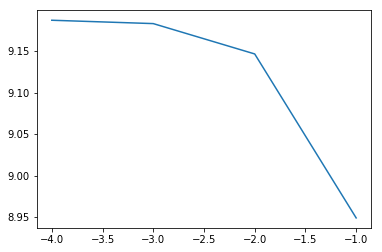

In [24]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(np.log10(lambda_his), rmse_his)
plt.show()